# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

The dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab

**Method 1** - You can use gdown module to get the data directly from Google drive to Colab

The syntax is as follows,
```bash
! gdown --id file_id
```
for ex - running the below cell will
```python
import the rvl-cdip.rar dataset
```
```bash
! gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu
```
**Method 2** - You can also import the data using wget function

https://www.youtube.com/watch?v=BPUfVq7RaY8


Unzip `rar` file using,
```python
#unrar the file
get_ipython().system_raw("unrar x rvl-cdip.rar")
```

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [1]:
import os
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import tensorflow
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Input

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import Callback

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%load_ext tensorboard

In [2]:
df = pd.read_csv('labels_final.csv',dtype = str)

In [3]:
print(df.shape)
df.head()

(48000, 2)


,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7




3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below. 

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

### <font color='blue'>Threshold Accuracies</font>
<img src = 'https://i.imgur.com/SnsqAd2.jpeg'>

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights. 
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer. 
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network. 

</pre>

In [4]:
# https://stackoverflow.com/a/35765856

# !watch -n1 nvidia-smi
!nvidia-smi

Thu Jul 14 14:58:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   33C    P8     8W /  70W |      0MiB / 15109MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
os.mkdir('Model_Weights')
os.mkdir('Model_Plots')

In [6]:
tensorflow.random.set_seed(42)

In [7]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

datagen = ImageDataGenerator(rescale =  1./255, shear_range = 0.2, zoom_range = 0.2,
                             validation_split = 0.25)

In [8]:
# https://medium.datadriveninvestor.com/keras-imagedatagenerator-methods-an-easy-guide-550ecd3c0a92

BATCH_SIZE = 32
DATA_DIR = 'data_final'

train_gen = datagen.flow_from_dataframe(dataframe = df, directory = DATA_DIR,
                        x_col = 'path', y_col = 'label', target_size = (256,256),
                        class_mode = 'categorical', batch_size = BATCH_SIZE,
                        subset = 'training', seed = 7, shuffle = True, color_mode = 'rgb')

test_gen = datagen.flow_from_dataframe(dataframe = df, directory = DATA_DIR,
                        x_col = 'path', y_col = 'label', target_size = (256,256),
                        class_mode = 'categorical', batch_size = BATCH_SIZE,
                        subset = 'validation', seed = 7, shuffle = True, color_mode = 'rgb')

Found 36000 validated image filenames belonging to 16 classes.
Found 12000 validated image filenames belonging to 16 classes.


In [9]:
base_model = VGG16(weights = 'imagenet', input_shape = (256, 256, 3), include_top = False)
base_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
______________________________________________________________

**INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer**

In [10]:
tensorflow.keras.backend.clear_session()

# https://keras.io/guides/transfer_learning/
# https://catalog.ngc.nvidia.com/orgs/nvidia/containers/dli-dl-fundamentals

base_model.trainable = False
inputs = Input(shape = (256, 256, 3))

x = base_model(inputs, training = False)
x = Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', name = 'Conv2D')(x)
x = MaxPool2D(name = 'MaxPooling')(x)
x = Flatten(name = 'Flattening')(x)
x = Dense(64, activation = 'relu', name = 'Dense_1')(x)
x = Dense(32, activation = 'relu', name = 'Dense_2')(x)
output_ = Dense(16, activation = 'softmax', name = 'Dense_3')(x)

final_model_1 = Model(inputs = inputs, outputs = output_, name = 'Model_1')
final_model_1.summary()

Model: "Model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
Conv2D (Conv2D)              (None, 6, 6, 512)         2359808   
_________________________________________________________________
MaxPooling (MaxPooling2D)    (None, 3, 3, 512)         0         
_________________________________________________________________
Flattening (Flatten)         (None, 4608)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                294976    
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                2080

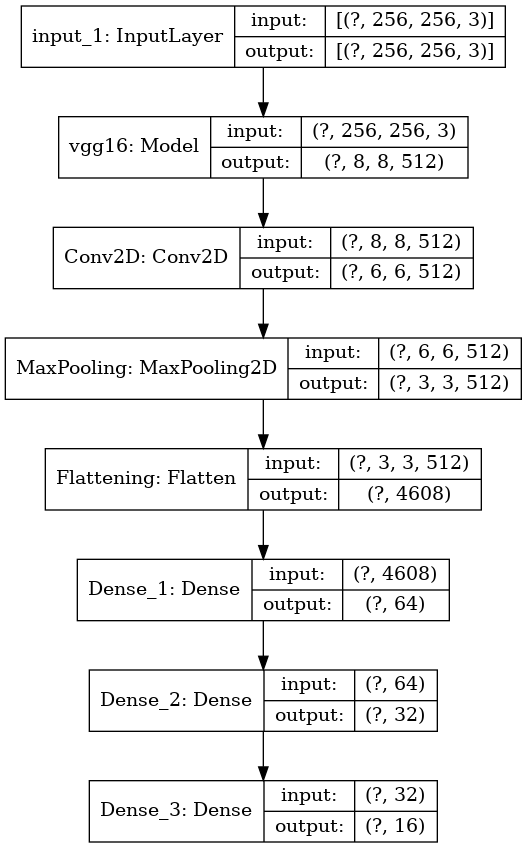

In [11]:
plot_model(final_model_1, to_file = 'Model_Plots/Model_1.png', show_shapes = True)

In [12]:
final_model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [13]:
logdir = 'logs/model_1/' + datetime.now().strftime('%Y%m%d_%H%M%S')
tensorBoard = TensorBoard(log_dir = logdir, histogram_freq = 1)

filepath = 'modelCheck/model_1/epo_{epoch:02d}-accu_{val_accuracy:.4f}.hdf5'
modelCheck = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1)

earlyStopping = EarlyStopping(monitor = 'accuracy', patience = 2, verbose = 1)
reduceLr = ReduceLROnPlateau(monitor = 'accuracy', factor = 0.9, patience = 2, verbose = 1)

callBack_List = [tensorBoard, modelCheck, earlyStopping, reduceLr]

In [14]:
step_train = train_gen.n // train_gen.batch_size
step_test = test_gen.n // test_gen.batch_size

In [15]:
EPOCHS_1 = 6
model_1 = final_model_1.fit(train_gen, steps_per_epoch = step_train, epochs = EPOCHS_1,
              validation_data = test_gen, validation_steps = step_test, callbacks = callBack_List)

Epoch 1/6
1125/1125 [==============================] - ETA: 0s - loss: 1.6810 - accuracy: 0.4734
Epoch 00001: saving model to modelCheck/model_1/epo_01-accu_0.5727.hdf5
1125/1125 [==============================] - 713s 634ms/step - loss: 1.6810 - accuracy: 0.4734 - val_loss: 1.3635 - val_accuracy: 0.5727 - lr: 0.0010
Epoch 2/6
1125/1125 [==============================] - ETA: 0s - loss: 1.2388 - accuracy: 0.6151
Epoch 00002: saving model to modelCheck/model_1/epo_02-accu_0.6342.hdf5
1125/1125 [==============================] - 671s 596ms/step - loss: 1.2388 - accuracy: 0.6151 - val_loss: 1.2049 - val_accuracy: 0.6342 - lr: 0.0010
Epoch 3/6
1125/1125 [==============================] - ETA: 0s - loss: 1.0989 - accuracy: 0.6604
Epoch 00003: saving model to modelCheck/model_1/epo_03-accu_0.6637.hdf5
1125/1125 [==============================] - 673s 598ms/step - loss: 1.0989 - accuracy: 0.6604 - val_loss: 1.1289 - val_accuracy: 0.6637 - lr: 0.0010
Epoch 4/6
1125/1125 [======================

In [16]:
final_model_1.save_weights('Model_Weights/best_model_1.h5')

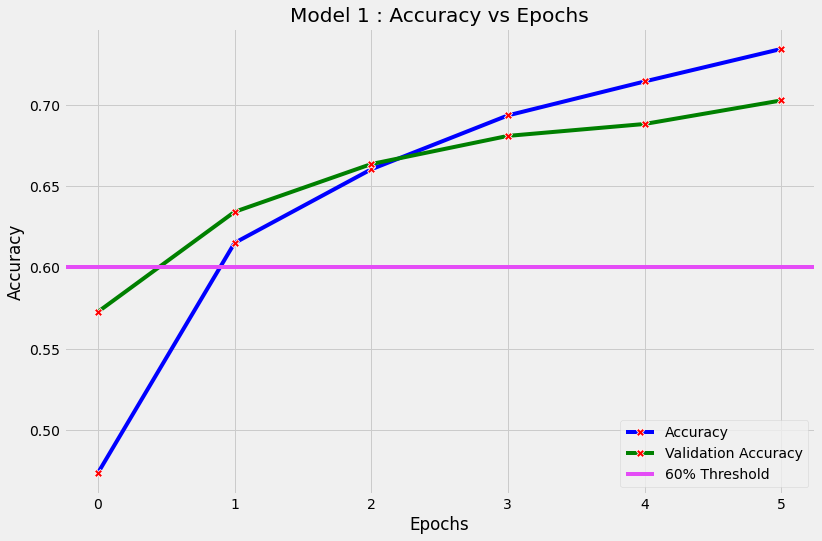

In [17]:
# https://wellsr.com/python/seaborn-line-plot-data-visualization/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

epochs_ = list(range(len(model_1.history['accuracy'])))
plt.figure(figsize = (12, 8))

sns.lineplot(y = 'accuracy', data = model_1.history , x = epochs_, label = 'Accuracy',
             color = 'b', marker = 'X', mfc = 'red', ms = 8)
sns.lineplot(y = 'val_accuracy', data = model_1.history , x = epochs_,
             label = 'Validation Accuracy', color = 'g', marker = 'X', mfc = 'red', ms = 8)

plt.axhline(0.6, color = '#E44CF6', label = '60% Threshold')
plt.title('Model 1 : Accuracy vs Epochs') ; plt.legend(loc = 4)
plt.xticks(epochs_) ; plt.xlabel('Epochs') ; plt.ylabel('Accuracy') ; plt.show()

**Observation**

- Only around 15% of parameters are trainable in total parameters.
- With 6 epochs we got ~73.45% accuracy and the loss got reduced from 1.6810 to 0.8707.
- The loss and accuracy shows that with higher epoch we can reduce loss and increase the accuracy of the model.

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC 
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers. 
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096. 
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the 
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model. 
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network. 
</pre>

**INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer**

* $W_{out\ }=\ \frac{W\ -\ F\ +\ 2P}{S}\ +\ 1$
* $H_{out}\ =\ \frac{H\ -\ F\ +\ 2P}{S}\ +\ 1$

In [18]:
tensorflow.keras.backend.clear_session()

In [19]:
# https://keras.io/guides/transfer_learning/
# https://catalog.ngc.nvidia.com/orgs/nvidia/containers/dli-dl-fundamentals
# https://mein2work.medium.com/converting-fc-layers-to-conv-layers-8a43880a44ed

base_model.trainable = False
inputs = Input(shape = (256, 256, 3))

x = base_model(inputs, training = False)
x = Conv2D(filters = 512, kernel_size = (8, 8), activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (1, 1), activation = 'relu')(x)
# x = Conv2D(filters = 16, kernel_size = (1, 1), activation = 'relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_ = Dense(16, activation='softmax')(x)


final_model_2 = Model(inputs = inputs, outputs = output_, name = 'Model_2')
final_model_2.summary()

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 512)         16777728  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 128)         65664     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
Total params: 31,560,144
Trainable params: 16,845,456
Non-trainable params: 14,714,688
______________________________________

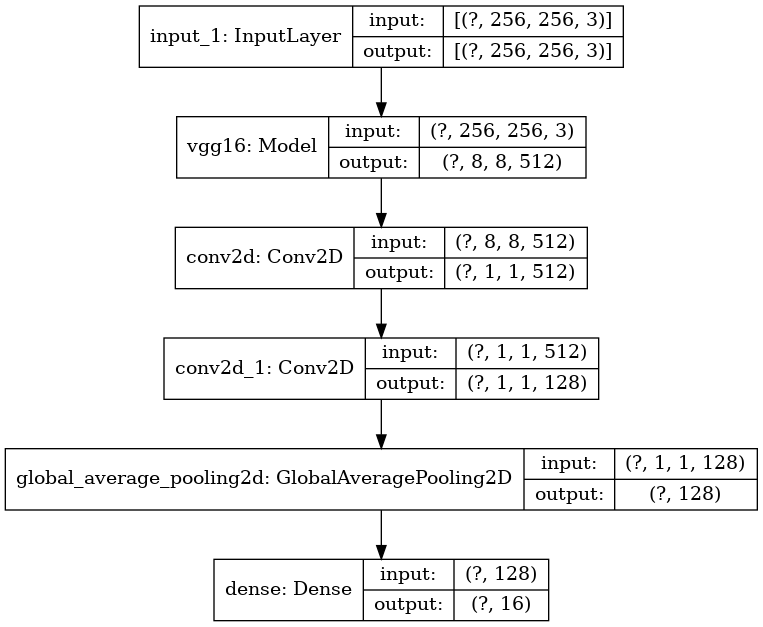

In [20]:
plot_model(final_model_2, to_file = 'Model_Plots/Model_2.png', show_shapes = True)

In [21]:
logdir = 'logs/model_2/' + datetime.now().strftime('%Y%m%d_%H%M%S')
tensorBoard = TensorBoard(log_dir = logdir, histogram_freq = 1)

filepath = 'modelCheck/model_2/epo_{epoch:02d}-accu_{val_accuracy:.4f}.hdf5'
modelCheck = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1)

callBack_List = [tensorBoard, modelCheck, earlyStopping, reduceLr]

In [22]:
final_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
EPOCHS_2 = 6
model_2 = final_model_2.fit(train_gen, steps_per_epoch = step_train, epochs = EPOCHS_2,
                validation_data = test_gen, validation_steps = step_test, callbacks = callBack_List)

Epoch 1/6
1125/1125 [==============================] - ETA: 0s - loss: 1.4232 - accuracy: 0.5759
Epoch 00001: saving model to modelCheck/model_2/epo_01-accu_0.6572.hdf5
1125/1125 [==============================] - 677s 602ms/step - loss: 1.4232 - accuracy: 0.5759 - val_loss: 1.1485 - val_accuracy: 0.6572 - lr: 0.0010
Epoch 2/6
1125/1125 [==============================] - ETA: 0s - loss: 1.0631 - accuracy: 0.6741
Epoch 00002: saving model to modelCheck/model_2/epo_02-accu_0.6690.hdf5
1125/1125 [==============================] - 675s 600ms/step - loss: 1.0631 - accuracy: 0.6741 - val_loss: 1.1056 - val_accuracy: 0.6690 - lr: 0.0010
Epoch 3/6
1125/1125 [==============================] - ETA: 0s - loss: 0.9474 - accuracy: 0.7098
Epoch 00003: saving model to modelCheck/model_2/epo_03-accu_0.6873.hdf5
1125/1125 [==============================] - 672s 598ms/step - loss: 0.9474 - accuracy: 0.7098 - val_loss: 1.0582 - val_accuracy: 0.6873 - lr: 0.0010
Epoch 4/6
1125/1125 [======================

In [24]:
final_model_2.save_weights('Model_Weights/best_model_2.h5')

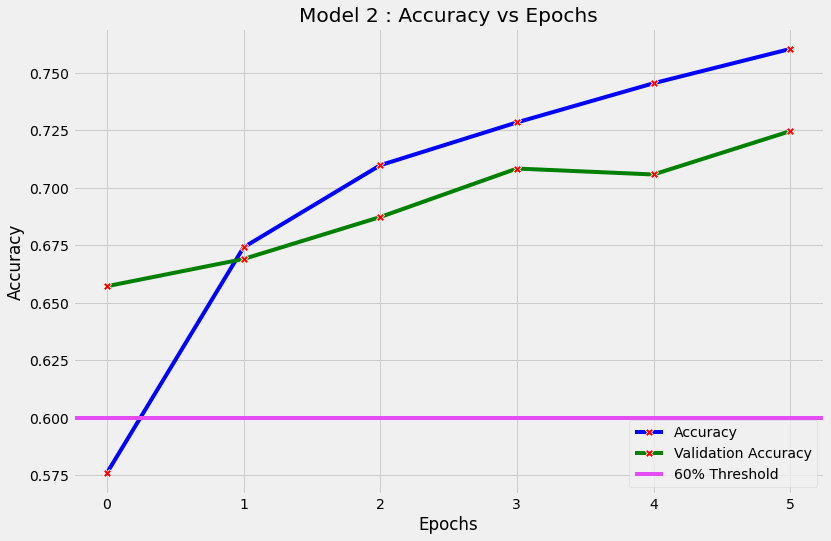

In [25]:
# https://wellsr.com/python/seaborn-line-plot-data-visualization/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

epochs_ = list(range(len(model_2.history['accuracy'])))
plt.figure(figsize = (12, 8))

sns.lineplot(y = 'accuracy', data = model_2.history , x = epochs_, label = 'Accuracy',
             color = 'b', marker = 'X', mfc = 'red', ms = 8)
sns.lineplot(y = 'val_accuracy', data = model_2.history , x = epochs_,
             label = 'Validation Accuracy', color = 'g', marker = 'X', mfc = 'red', ms = 8)

plt.axhline(0.6, color = '#E44CF6', label = '60% Threshold')
plt.title('Model 2 : Accuracy vs Epochs') ; plt.legend(loc = 4)
plt.xticks(epochs_) ; plt.xlabel('Epochs') ; plt.ylabel('Accuracy') ; plt.show()

**Observation**

- Around 53% of parameters are trainable here.
- The loss was 0.7710 and accuracy was 76.03% in this model.
- This shows comparing to pervious model this model is giving much more better result in same 6 epochs.
- The curve also indicates that probabily with more epoch we can increase the accuracy and reduce the loss.

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [26]:
tensorflow.keras.backend.clear_session()
tensorflow.random.set_seed(42)

In [27]:
# https://www.w3resource.com/python/python-format.php

base_model = VGG16(weights = 'imagenet', input_shape = (256, 256, 3), include_top = False)

le_ = len(base_model.layers)

for layer in range(le_-6):
    base_model.layers[layer].trainable = False
    
count_true = 0
for layer in base_model.layers:
    if layer.trainable:
        count_true += 1
    print(f'{layer.name:15} {layer.trainable}')
print(f'\nNumber of Trainable Layers from base_model : {count_true}')

input_1         False
block1_conv1    False
block1_conv2    False
block1_pool     False
block2_conv1    False
block2_conv2    False
block2_pool     False
block3_conv1    False
block3_conv2    False
block3_conv3    False
block3_pool     False
block4_conv1    False
block4_conv2    False
block4_conv3    True
block4_pool     True
block5_conv1    True
block5_conv2    True
block5_conv3    True
block5_pool     True

Number of Trainable Layers from base_model : 6


In [28]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [29]:
tensorflow.keras.backend.clear_session()

# https://keras.io/guides/transfer_learning/
# https://catalog.ngc.nvidia.com/orgs/nvidia/containers/dli-dl-fundamentals
# https://mein2work.medium.com/converting-fc-layers-to-conv-layers-8a43880a44ed

inputs = Input(shape = (256, 256, 3))

x = base_model(inputs, training = False)
x = Conv2D(filters = 512, kernel_size = (8, 8), activation = 'relu')(x)
x = Conv2D(filters = 128, kernel_size = (1, 1), activation = 'relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output_ =Dense(16, activation='softmax')(x)

final_model_3 = Model(inputs = inputs, outputs = output_, name = 'Model_3')

final_model_3.summary()

Model: "Model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 512)         16777728  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 128)         65664     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                2064      
Total params: 31,560,144
Trainable params: 26,284,688
Non-trainable params: 5,275,456
_______________________________________

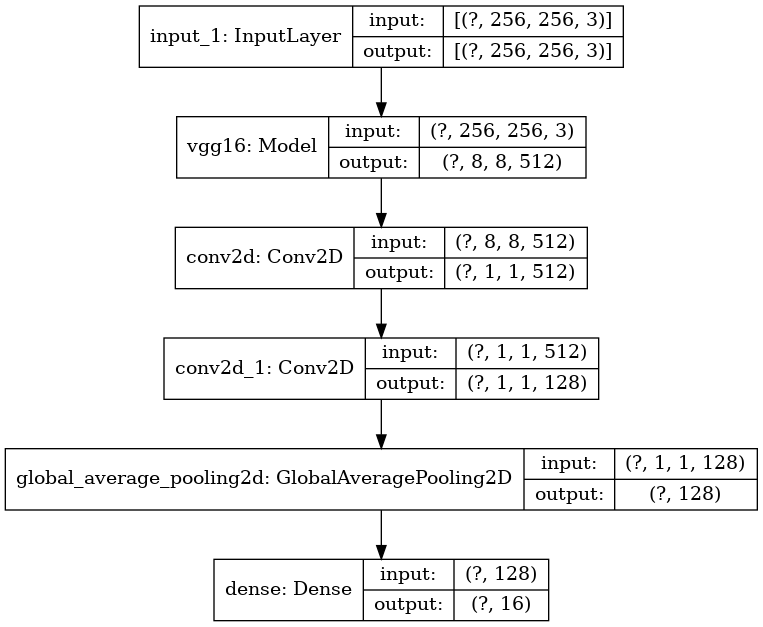

In [30]:
plot_model(final_model_3, to_file = 'Model_Plots/Model_3.png', show_shapes = True)

In [31]:
final_model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
logdir = 'logs/model_3/' + datetime.now().strftime('%Y%m%d_%H%M%S')
tensorBoard = TensorBoard(log_dir = logdir, histogram_freq = 1)

filepath = 'modelCheck/model_3/epo_{epoch:02d}-accu_{val_accuracy:.4f}.hdf5'
modelCheck = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1)

callBack_List = [tensorBoard, modelCheck, earlyStopping, reduceLr]

In [33]:
EPOCHS_3 = 5
model_3 = final_model_3.fit(train_gen, steps_per_epoch = step_train, epochs = EPOCHS_3,
                validation_data = test_gen, validation_steps = step_test, callbacks = callBack_List)

Epoch 1/5
1125/1125 [==============================] - ETA: 0s - loss: 2.7965 - accuracy: 0.0618
Epoch 00001: saving model to modelCheck/model_3/epo_01-accu_0.0584.hdf5
1125/1125 [==============================] - 683s 607ms/step - loss: 2.7965 - accuracy: 0.0618 - val_loss: 2.7728 - val_accuracy: 0.0584 - lr: 0.0010
Epoch 2/5
1125/1125 [==============================] - ETA: 0s - loss: 2.7728 - accuracy: 0.0618
Epoch 00002: saving model to modelCheck/model_3/epo_02-accu_0.0587.hdf5
1125/1125 [==============================] - 684s 608ms/step - loss: 2.7728 - accuracy: 0.0618 - val_loss: 2.7728 - val_accuracy: 0.0587 - lr: 0.0010
Epoch 3/5
1125/1125 [==============================] - ETA: 0s - loss: 2.7728 - accuracy: 0.0629
Epoch 00003: saving model to modelCheck/model_3/epo_03-accu_0.0596.hdf5
1125/1125 [==============================] - 686s 609ms/step - loss: 2.7728 - accuracy: 0.0629 - val_loss: 2.7730 - val_accuracy: 0.0596 - lr: 0.0010
Epoch 4/5
1125/1125 [======================

In [34]:
final_model_3.save_weights('Model_Weights/best_model_3.h5')

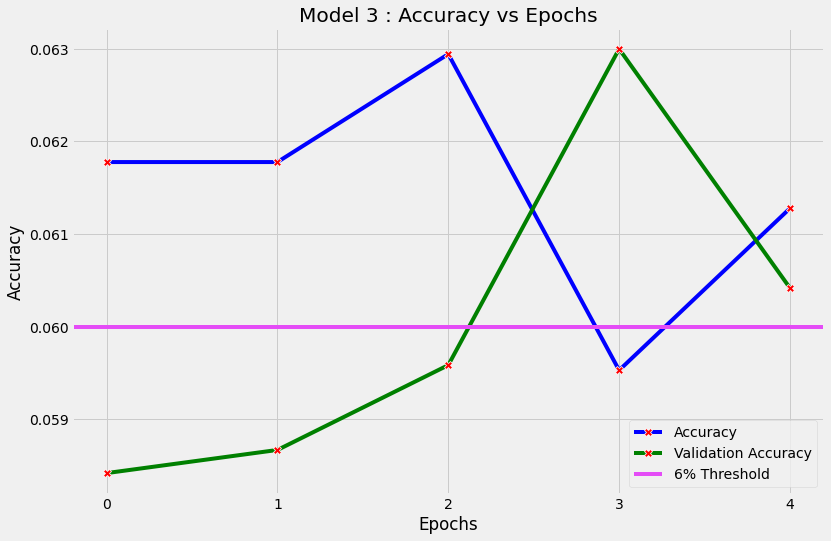

In [35]:
# https://wellsr.com/python/seaborn-line-plot-data-visualization/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html

epochs_ = list(range(len(model_3.history['accuracy'])))
plt.figure(figsize = (12, 8))
sns.lineplot(y = 'accuracy', data = model_3.history , x = epochs_, label = 'Accuracy',
             color = 'b', marker = 'X', mfc = 'red', ms = 8)
sns.lineplot(y = 'val_accuracy', data = model_3.history , x = epochs_,
             label = 'Validation Accuracy', color = 'g', marker = 'X', mfc = 'red', ms = 8)
plt.axhline(0.06, color = '#E44CF6', label = '6% Threshold')
plt.title('Model 3 : Accuracy vs Epochs') ; plt.legend(loc = 4)
plt.xticks(epochs_) ; plt.xlabel('Epochs') ; plt.ylabel('Accuracy') ; plt.show()

**Observation**

- The accuracy for this model is only less than 10%.
- Morethan 83% of parameters are trainable from total parameters.
- The loss was more than 2.5. This both indicates the model performance was pritty bad.
- This indicates that training VGG16 layaers won't give better accuracy always.
- Since from the grapgh indications, it is clear that may be with more epoch values may be we will get much more better results.
- Higher trainable parameters will give better result at higher epochs.

### Models Summary

In [36]:
# https://pypi.org/project/prettytable/

from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Model', 'Number of epochs', 'Accuracy',
                     'Validation Accuracy']

table.add_row(['Model_1', EPOCHS_1, round(model_1.history['accuracy'][-1], 4),
               round(model_1.history['val_accuracy'][-1], 4)])

table.add_row(['Model_2', EPOCHS_2, round(model_2.history['accuracy'][-1], 4),
               round(model_2.history['val_accuracy'][-1], 4)])

table.add_row(['Model_3', EPOCHS_3, round(model_3.history['accuracy'][-1], 4),
               round(model_3.history['val_accuracy'][-1], 4)])

print(table)

+---------+------------------+----------+---------------------+
|  Model  | Number of epochs | Accuracy | Validation Accuracy |
+---------+------------------+----------+---------------------+
| Model_1 |        6         |  0.7345  |        0.7028       |
| Model_2 |        6         |  0.7603  |        0.7246       |
| Model_3 |        5         |  0.0613  |        0.0604       |
+---------+------------------+----------+---------------------+


<br><br><br>
## TensorBoard Outputs

### Model - 1<br>
<img src = 'https://i.imgur.com/PvUSbcp.png' >

<img src = 'https://i.imgur.com/XDbVJ5Q.png' >

### Model - 2<br>
<img src = 'https://i.imgur.com/1K6FPRp.png' >

<img src = 'https://i.imgur.com/p1X4Ctj.png' >

### Model - 3<br>
<img src = 'https://i.imgur.com/5qfS939.png' >

<img src = 'https://i.imgur.com/Xot6oRn.png' >